# Graph Algorithms

## Undirected Graph

In [75]:
from typing import TypeVar, List, Dict, Tuple
T = TypeVar("T")

class Graph:
    """
    An undirected Graph with adjacency lists (dictionary)
    """

    def __init__(self):
        """
        Constructor
        """
        self._vertices: Dict[T, List[T]] = { }

    def add_edge(self, v: T, u: T) -> None:
        """
        Add an edge between v and u to the graph
        """
        if v not in self._vertices:
            self._vertices[v] = []
        if u not in self._vertices:
            self._vertices[u] = []

        self._vertices[v].append(u)
        self._vertices[u].append(v)

    def get_edges(self, v:T):
        """
        Return the list of edges for vertex v 
        """
        return self._vertices[v]
    
    def get_vertices(self) -> List[T]:
        """
        Return the list of the vertices in the graph
        """
        return self._vertices.keys()
    
    def edge_list(self) -> List[Tuple[T,T]]:
        """
        Return the list of edges in the graph as a list of tuples. 
        """
        l = []
        for v in self._vertices:
            for e in self._vertices[v]:
                l.append((v, e))
        return l
    
    def __str__(self):
        """
        Pretty print the adjacency lists of the graph.
        """
        r = ""
        for u in self.get_vertices():
            r += "{0} --> [".format(u)
            for v in self.get_edges(u):
                r+= "{0}, ".format(v)
            r += '{0}{0}]\n'.format(chr(0x8))
        return r

## Example graph of US cities

![USA](images/USA-unweighted.png)

In [76]:
# Build the Graph of US cities
def build_cities_graph():
    cities = Graph()

    cities.add_edge("Seattle", "Chicago")
    cities.add_edge("Seattle", "San Francisco")
    cities.add_edge("San Francisco", "Riverside")
    cities.add_edge("San Francisco", "Los Angeles")
    cities.add_edge("Los Angeles", "Riverside")
    cities.add_edge("Los Angeles", "Phoenix")
    cities.add_edge("Riverside", "Phoenix")
    cities.add_edge("Riverside", "Chicago")
    cities.add_edge("Phoenix", "Dallas")
    cities.add_edge("Phoenix", "Houston")
    cities.add_edge("Dallas", "Chicago")
    cities.add_edge("Dallas", "Atlanta")
    cities.add_edge("Dallas", "Houston")
    cities.add_edge("Houston", "Atlanta")
    cities.add_edge("Houston", "Miami")
    cities.add_edge("Atlanta", "Chicago")
    cities.add_edge("Atlanta", "Washington")
    cities.add_edge("Atlanta", "Miami")
    cities.add_edge("Miami", "Washington")
    cities.add_edge("Chicago", "Detroit")
    cities.add_edge("Detroit", "Boston")
    cities.add_edge("Detroit", "Washington")
    cities.add_edge("Detroit", "New York")
    cities.add_edge("Boston", "New York")
    cities.add_edge("New York", "Philadelphia")
    cities.add_edge("Philadelphia", "Washington")
    return cities

In [77]:
g = build_cities_graph()
print(g) # use __str__ method to pretty print adjacency lists

Seattle --> [Chicago, San Francisco]
Chicago --> [Seattle, Riverside, Dallas, Atlanta, Detroit]
San Francisco --> [Seattle, Riverside, Los Angeles]
Riverside --> [San Francisco, Los Angeles, Phoenix, Chicago]
Los Angeles --> [San Francisco, Riverside, Phoenix]
Phoenix --> [Los Angeles, Riverside, Dallas, Houston]
Dallas --> [Phoenix, Chicago, Atlanta, Houston]
Houston --> [Phoenix, Dallas, Atlanta, Miami]
Atlanta --> [Dallas, Houston, Chicago, Washington, Miami]
Miami --> [Houston, Atlanta, Washington]
Washington --> [Atlanta, Miami, Detroit, Philadelphia]
Detroit --> [Chicago, Boston, Washington, New York]
Boston --> [Detroit, New York]
New York --> [Detroit, Boston, Philadelphia]
Philadelphia --> [New York, Washington]



## Depth First Search (DFS)

Keep track of pre and post visit numbers

In [78]:
def dfs(g: Graph, v:T) -> Tuple[List[T], Dict[T,int], Dict[T, int]]:

    def explore(v:T):
        nonlocal clock # clock is defined in the outer scope
        visited[v] = True
        order.append(v)
        pre[v] = clock
        clock += 1
        
        for e in g.get_edges(v):
            if e not in visited:
                explore(e)
                
        post[v] = clock
        clock += 1

    # The main part of the DFS function
    order = []        # The DFS order
    visited = dict()  # The visited dictionary
    pre = dict()      # prevsit number dictionary
    post = dict()     # postvisit number dictionary
    clock = 0         # counter for numbers pre/post visits
    
    explore(v)
    
    for v in g.get_vertices():
        if v not in visited:
            explore(v)
    return order, pre, post

In [79]:
# Example graph from exercise 3.1 graph 
g31 = Graph()  
g31.add_edge('a','b')
g31.add_edge('a','e')
g31.add_edge('b','c')
g31.add_edge('b','e')
g31.add_edge('c','f')
g31.add_edge('e','f')
g31.add_edge('f','i')
g31.add_edge('d', 'g')
g31.add_edge('g', 'h')
g31.add_edge('h', 'd')
order, pre, post = dfs(g31, 'a')
print(order)
print(pre)
print(post)

['a', 'b', 'c', 'f', 'e', 'i', 'd', 'g', 'h']
{'a': 0, 'b': 1, 'c': 2, 'f': 3, 'e': 4, 'i': 6, 'd': 12, 'g': 13, 'h': 14}
{'e': 5, 'i': 7, 'f': 8, 'c': 9, 'b': 10, 'a': 11, 'h': 15, 'g': 16, 'd': 17}


## Directed Graphs

Inherits the graph class and override the `add_edge` function so we just add an edge in one direction

In [80]:
class DiGraph(Graph):

    def __init__(self):
        super().__init__()

    def add_edge(self, v:T, u:T):
        if v not in self.get_vertices():
            self._vertices[v] = []
        if u not in self._vertices:
            self._vertices[u] = []

        self._vertices[v].append(u)  # only append in one direction
  

A helper function to read a file of edges and return the DiGraph. 

In [81]:
def build_digraph(fn: str, sep=' ') -> DiGraph:
    f = open(fn)
    dg = DiGraph()
    for line in f:
        (u,v) = line.strip().split(sep)
        dg.add_edge(u,v)
    
    return dg


## DFS with Stack

Replace recursion using a stack 

In [82]:
def dfs(g: Graph, v:T):
    order = []
    visited = { }
    s = []         # use a list as a stack
    s.append(v)    # initialize stack with starting vertex 

    while len(s) > 0:
        curr = s.pop()
        
        if curr not in visited:
            visited[curr] = True
            order.append(curr)
            for e in g.get_edges(curr):
                if e not in visited:
                    s.append(e)
    return order



## Breadth First Search (BFS)

Breadth First Search use a queue. We use a double ended queue called `deque` pronounced _deck_.  Ntice this is the same as the Depth First Search where we just replace the stack with a queue.

In [83]:
from collections import deque

def bfs(g: Graph, v:T) -> Tuple[List[T], Dict[T,T]]:
    order = []       # The breadth first order
    visited = { }    # te visited dictionary
    q = deque()      # the queue
    q.appendleft(v)  # initialize the queue with the starting vertex
    prev = dict()    # the previous dictionary for reconstructing paths

    while len(q) > 0:
        curr = q.pop()          # removes item in queue
        if curr not in visited:
            visited[curr] = True
            order.append(curr)
            for e in g.get_edges(curr):
                if e not in visited:
                    q.appendleft(e)
                    prev[e] = curr
    return order, prev

### Graphviz graph visualization module

Sometimes it is helpful to be able to draw the graph using [Graphviz](https://graphviz.readthedocs.io/)

Need to do the following

```
conda install graphviz
conda install python-graphviz
```

In [84]:
import graphviz

def g2gviz(g: Graph, fn: str) -> None:
    """
    A function to return a graphviz graph from one of our Graph objects
    """
    if isinstance(g,DiGraph):
        print("generating graphviz Digraph")
        gv = graphviz.Digraph(format = 'png', filename = fn)
    elif isinstance(g, Graph):
        print("generating graphviz Graph")
        gv = graphviz.Graph(format = 'png', filename = fn)
        
    edges = g.edge_list()
    nodups = []
    
    # remove the duplicate edges one of (u,v) or (v,u)
    for (u,v) in edges:
        if (v,u) not in nodups:
            nodups.append((u,v))
        
    for (u,v) in nodups:
        gv.edge(u,v)
        
    return gv

In [85]:
gv = g2gviz(g,'states')
gv.render(filename='states.dot')

generating graphviz Graph


'states.dot.png'

<img src = "states.dot.png" width="50%" />

generating graphviz Graph


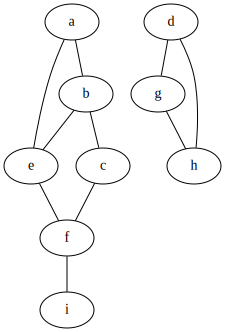

In [87]:
gv = g2gviz(g31,'exercise31.png')
gv

## Example Digraph 

In [88]:
dg = build_digraph('dg.txt')
gv = g2gviz(dg,'states')
gv.render(filename='digraph_example.dot')

generating graphviz Digraph


'digraph_example.dot.png'

Here is the image we've been using in the class and lectures for the above digraph 

<img src = "images/dirgraph_sedgewick.png" width = "25%"/>

And here is how graphviz renders it. Which do you like better? 

<img src = "digraph_example.dot.png" width = "50%"/>

In [16]:
order, prev = bfs(dg,'7')

## Another Example DiGraph

In [17]:
dg = build_digraph('dg2.txt', sep=',')  # read from CSV file
gv = g2gviz(dg,'levitin4_2_9')
gv.render(filename='levitin4_2_9.dot')


generating graphviz Digraph


'levitin4_2_9.dot.png'

<img src = "levitin4_2_9.dot.png" width = "25%"/>

## Reconstructing Paths from the `prev` dictionary

In [18]:
def path(prev: Dict[T,T], x:T, y:T):
    s = []
    curr = y
    while curr != x:
        s.append(curr)
        curr = prev[curr]
    s.append(x)
    return s[::-1]


In [19]:
print(path(prev, '7', '12'))

['7', '9', '11', '12']


In [20]:
prev

{'9': '7',
 '6': '7',
 '10': '9',
 '11': '9',
 '0': '6',
 '8': '6',
 '4': '11',
 '12': '11',
 '1': '0',
 '5': '0',
 '2': '4',
 '3': '2'}

## Exercise - BFS
Do a BFS if the following graph starting at Boston and showing the state of the Queue at each step.

Also show the `prev` dictionary. Assume each city is a layover on a train ride. What path minimizes the number of layovers from Boston to Miami. Use abbreviations for city names like Bos, Det, LA

![USA](images/USA-unweighted.png)

In [21]:
order,prev = bfs(g,'Boston')

In [22]:
prev

{'Detroit': 'Boston',
 'New York': 'Detroit',
 'Chicago': 'Detroit',
 'Washington': 'Detroit',
 'Philadelphia': 'Washington',
 'Seattle': 'Chicago',
 'Riverside': 'Chicago',
 'Dallas': 'Chicago',
 'Atlanta': 'Dallas',
 'Miami': 'Atlanta',
 'San Francisco': 'Riverside',
 'Los Angeles': 'San Francisco',
 'Phoenix': 'Los Angeles',
 'Houston': 'Phoenix'}

## Shortest Path in an unweighted graph

In [23]:
from collections import deque

def shortest_paths(g: Graph, v:T) -> Tuple[Dict[T,T], Dict[T,T]]:
    dist = dict()   # distance dictionary 
    q = deque()     # queue
    q.appendleft(v) # initialize queue
    prev = dict()   # previous dictionary
    dist[v] = 0     

    while len(q) > 0:
        print(q)
        curr = q.pop()        # removes right item in queue
        for e in g.get_edges(curr):
            if e not in dist:
                q.appendleft(e)
                dist[e] = dist[curr] + 1
                prev[e] = curr
    return dist, prev

In [24]:
dist,prev = shortest_paths(g, 'Boston')

deque(['Boston'])
deque(['New York', 'Detroit'])
deque(['Washington', 'Chicago', 'New York'])
deque(['Philadelphia', 'Washington', 'Chicago'])
deque(['Atlanta', 'Dallas', 'Riverside', 'Seattle', 'Philadelphia', 'Washington'])
deque(['Miami', 'Atlanta', 'Dallas', 'Riverside', 'Seattle', 'Philadelphia'])
deque(['Miami', 'Atlanta', 'Dallas', 'Riverside', 'Seattle'])
deque(['San Francisco', 'Miami', 'Atlanta', 'Dallas', 'Riverside'])
deque(['Phoenix', 'Los Angeles', 'San Francisco', 'Miami', 'Atlanta', 'Dallas'])
deque(['Houston', 'Phoenix', 'Los Angeles', 'San Francisco', 'Miami', 'Atlanta'])
deque(['Houston', 'Phoenix', 'Los Angeles', 'San Francisco', 'Miami'])
deque(['Houston', 'Phoenix', 'Los Angeles', 'San Francisco'])
deque(['Houston', 'Phoenix', 'Los Angeles'])
deque(['Houston', 'Phoenix'])
deque(['Houston'])


# Weighted Graphs

<img src="images/USA-weighted.png" />

The shortest path from Boston to Miami is not the path that visits the fewest vertices

```
Boston -> Detroit -> Washington -> Miami
```

but 

```
Boston -> New York -> Philadelphia -> Washington -> Miami
```

## Representing Weighted Graphs

An undirected weighted graph

In [25]:
class WeightedGraph(Graph):

    def __init__(self):
        super().__init__()

    def add_edge(self, v:T, u:T, weight: int):
        if v not in self.get_vertices():
            self._vertices[v] = []
        if u not in self._vertices:
            self._vertices[u] = []

        self._vertices[v].append((u, weight))
        self._vertices[u].append((v, weight))


In [26]:
from typing import  TypeVar, Dict
from math import inf

T = TypeVar('T')


def sp1(g: WeightedGraph, s: T):

    def smallest(d: Dict[T,float], seen: set) -> T:
        """
        Find the snallest vertex v in d that is not in seen
        """
        smallest_v = None    
        smallest_dist = inf

        for k in d:
            if k in seen:
                continue

            if d[k] < smallest_dist:
                smallest_dist = d[k]
                smallest_v = k

        return smallest_v

    # main part of sp
    dist = {v:inf for v in g.get_vertices()}
    dist[s] = 0
    seen = set()
    prev = dict()
 
    while len(seen) < len(g.get_vertices()):   # O(|V|)
        v = smallest(dist, seen)               # O(|V|)
        seen.add(v)

        for (e,w) in g.get_edges(v):           # O(|E|)
            if dist[e] > dist[v] + w:
                dist[e] = dist[v] + w
                prev[e] = v

    return dist, prev


## Shortest Path in a Weighted Graph using a Min Heap

#### Sometimes min/max heaps are called _priority queues_

In [27]:
# I had to copy the heap class in to s separate Python file Heap.py
# so I could import it
from Heap import heap

In [28]:
def sp(g: WeightedGraph, s: T):
    dist = { v: inf for v in g.get_vertices() }
    dist[s] = 0
    prev = dict()

    pq = heap([(dist[v],v) for v in dist])

    while len(pq._h) > 0:              # O(|V|)
        (d,v) = pq.delete_root()       # O(log(|V|))
 
        for (e,w) in g.get_edges(v):   # O(|E|)
            if dist[e] > dist[v] + w:
                dist[e] = dist[v] + w
                prev[e] = v
                pq.decrease_key(e, dist[e])
 
    return dist, prev

# Disjkstra's O(|V|log(|V|) + O(|V||E|))


## Example: Shortest Path Weighted Graph US map
Here is an example weighted graph of our US map.

In [29]:
def build_weighted_graph():
    cities = WeightedGraph()
    cities.add_edge("Seattle", "Chicago", 1737)
    cities.add_edge("Seattle", "San Francisco", 678)
    cities.add_edge("San Francisco", "Riverside", 386)
    cities.add_edge("San Francisco", "Los Angeles", 348)
    cities.add_edge("Los Angeles", "Riverside", 50)
    cities.add_edge("Los Angeles", "Phoenix", 357)
    cities.add_edge("Riverside", "Phoenix", 307)
    cities.add_edge("Riverside", "Chicago", 1704)
    cities.add_edge("Phoenix", "Dallas", 887)
    cities.add_edge("Phoenix", "Houston", 1015)
    cities.add_edge("Dallas", "Chicago", 805)
    cities.add_edge("Dallas", "Atlanta", 721)
    cities.add_edge("Dallas", "Houston", 225)
    cities.add_edge("Houston", "Atlanta", 702)
    cities.add_edge("Houston", "Miami", 968)
    cities.add_edge("Atlanta", "Chicago", 588)
    cities.add_edge("Atlanta", "Washington", 543)
    cities.add_edge("Atlanta", "Miami", 604)
    cities.add_edge("Miami", "Washington", 923)
    cities.add_edge("Chicago", "Detroit", 238)
    cities.add_edge("Detroit", "Boston", 613)
    cities.add_edge("Detroit", "Washington", 396)
    cities.add_edge("Detroit", "New York", 482)
    cities.add_edge("Boston", "New York", 190)
    cities.add_edge("New York", "Philadelphia", 81)
    cities.add_edge("Philadelphia", "Washington", 123)
    #cities.add_edge("Boston", "Montreal", 308)

    return cities


In [30]:
cities = build_weighted_graph()

In [31]:
dist,prev = sp(cities,'Boston')

In [32]:
path(prev,'Boston', 'Los Angeles')

['Boston', 'Detroit', 'Chicago', 'Riverside', 'Los Angeles']

In [33]:
path(prev,'Boston', 'Miami')

['Boston', 'New York', 'Philadelphia', 'Washington', 'Miami']

In [34]:
path(prev,'Boston', 'Phoenix')

['Boston', 'Detroit', 'Chicago', 'Dallas', 'Phoenix']

## Minimum Spanning Tree
### Prim's Algorithm

In [60]:
from Heap import heap
from typing import Tuple, Dict, TypeVar, List
T = TypeVar("T")
Prev = Dict[T, Tuple[T, float]]

def prim(g: WeightedGraph, start: T) -> Prev:
    prev = dict()
    visited = dict() # keep us from creating cycles
    h = heap()  # heap of edges

    # for each vertex connected to v that is not visited
    # add the edge to the heap.
    def visit(v : T):
        visited[v] = True
        for (z, w) in g.get_edges(v):
            if z not in visited:
                h.insert((v, z), w)   

    visit(start)
    while len(h._h) > 0:
        (c, (v,z)) = h.delete_root() # delete the lowest cost edge
        if z in visited:
            continue

        visit(z)
        prev[z] = (v, c)
    return prev

### Example Graph
<img src = "example_for_prims.jpg" width="35%" />

In [61]:
g = WeightedGraph()
g.add_edge('a','b', 4)
g.add_edge('b','d', 5)
g.add_edge('c','d', 1)
g.add_edge('a','c', 2)
g.add_edge('e','f', 2)
g.add_edge('d','f', 6)
g.add_edge('c','f', 3)
g.add_edge('c','e', 6)
g.add_edge('a','e', 3)

In [62]:
print(g)

a --> [('b', 4), ('c', 2), ('e', 3)]
b --> [('a', 4), ('d', 5)]
d --> [('b', 5), ('c', 1), ('f', 6)]
c --> [('d', 1), ('a', 2), ('f', 3), ('e', 6)]
e --> [('f', 2), ('c', 6), ('a', 3)]
f --> [('e', 2), ('d', 6), ('c', 3)]



In [63]:
prim(g,'c')

{'d': ('c', 1), 'a': ('c', 2), 'e': ('a', 3), 'f': ('e', 2), 'b': ('a', 4)}